In [1]:
import os
from IPython.display import display, Markdown

from agno.agent import Agent
from agno.workflow import Workflow
from agno.models.openai import OpenAIChat
from agno.tools.duckduckgo import DuckDuckGoTools
from agno.db.sqlite import SqliteDb
from agno.memory import MemoryManager

from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv(filename=".env"))

openai_api_key = os.getenv("OPENAI_API_KEY")
openai_base_url = os.getenv("OPENAI_API_BASE_URL")
openai_model = os.getenv("OPENAI_MODEL")

ddg_tool = DuckDuckGoTools(fixed_max_results=5, enable_news=False, enable_search=True)

db = SqliteDb("./data.db")

In [2]:
model = OpenAIChat(
  id=openai_model,
  api_key=openai_api_key,
  base_url=openai_base_url,
  max_completion_tokens=1536,
  temperature=0.4,
  reasoning_effort="low"
  )

In [3]:
research_agent = Agent(
    model=model,
    name="Researcher",
    stream=True,
    tools=[ddg_tool],
    markdown=True,
    instructions="Твоя задача - поиск информации в интернете и возврат акутальной информации на запрос пользователя",
)

writer_agent = Agent(
  model=model,
  name="Writer",
  stream=True,
  markdown=True,
  instructions="Твоя задача - на основе информации от Агента Поисковика собрать информацию и дать структурированный и четкий ответ на вопрос пользователя"
)

search_workflow = Workflow(
  name="Search and Response",
  steps=[research_agent, writer_agent]
)

search_workflow.print_response("Кто такие группа Нервы и в каком году они появились?", stream=True)

┏━ Workflow Information ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                                 ┃
┃ Workflow: Search and Response                                                                                   ┃
┃                                                                                                                 ┃
┃ Steps: 2 steps                                                                                                  ┃
┃                                                                                                                 ┃
┃ Message: Кто такие группа Нервы и в каком году они появились?                                                   ┃
┃                                                                                                                 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Output()

┏━ Step 1: Researcher (Completed) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                                 ┃
┃ <search_results> [{'title': 'Нервы (группа) — Википедия', 'href':                                               ┃
┃ 'https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B2%D1%8B_(%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0)', 'body':  ┃
┃ 'Группа «Нервы» — российская рок-группа, образованная в2010 году в Москве. Основатель и лидер группы — Максим   ┃
┃ Фёдоров. Группа исполняет песни в жанрах поп-панк, альтернативный рок и инди-рок.'}, {'title': 'Группа «Нервы»  ┃
┃ — биография коллектива, альбомы и песни', 'href': 'https://www.kp.ru/putevoditel/muzyka/gruppa-nervy/', 'body': ┃
┃ 'Группа «Нервы» появилась в2010 году. Ее основатель — Максим Федоров, который стал автором всех песен           ┃
┃ коллектива. Изначально группа выступала в клубах Москвы, а первый альбом «Выход в город» выпустила в2012        ┃
┃ году.'}, {'title': 'Группа Нервы: история создания, участники, популярные песни', 'href':                       ┃
┃ 'https://musecube.org/gruppa-nervy-istoriya-sozdaniya-uchastniki-populyarnye-pesni/', 'body': 'Российская       ┃
┃ рок-группа «Нервы» была основана в2010 году в Москве. Основателем и бессменным лидером коллектива является      ┃
┃ Максим Фёдоров, который пишет музыку и тексты для всех песен группы.'}, {'title': 'Группа Нервы: история,       ┃
┃ участники, дискография | Роккульт', 'href': 'https://rockcult.ru/artist/nervy', 'body': 'Группа «Нервы» —       ┃
┃ российский музыкальный коллектив, играющий в жанрах поп-панк и альтернативный рок. Группа образована в2010 году ┃
┃ в Москве Максимом Фёдоровым, который является автором всех песен.'}, {'title': 'Нервы (группа) - это... Что     ┃
┃ такое Нервы (группа)?', 'href': 'https://dic.academic.ru/dic.nsf/ruwiki/1810920', 'body': '«Нервы» — российская ┃
┃ рок-группа, основанная в2010 году в Москве. Лидер и автор песен — Максим Фёдоров. Группа получила известность   ┃
┃ благодаря энергичным выступлениям и искренним текстам.'}] </search_results>                                     ┃
┃                                                                                                                 ┃
┃ Группа "Нервы" — российский рок-коллектив, играющий в жанрах поп-панк и альтернативный рок. Вот ключевые факты: ┃
┃                                                                                                                 ┃
┃  1 Год основания:2010 (Москва)                                                                                  ┃
┃  2 Основатель: Максим Фёдоров (автор всех песен группы)                                                         ┃
┃  3 Стиль: Энергичный микс поп-панка, альтернативного рока и инди-рокаГруппа "Нервы" — российский музыкальный    ┃
┃    коллектив, основанный в 2010 году в Москве. Вот основные факты о группе:                                     ┃
┃                                                                                                                 ┃
┃ ###🔍 Основная информация:                                                                                      ┃
┃                                                                                                                 ┃
┃  • Основатель: Максим Фёдоров (автор всех песен, вокалист и гитарист)- Жанры: поп-панк, альтернативный рок,     ┃
┃    инди-рок- Дебютный альбом: «Выход в город» (2012)                                                            ┃
┃                                                                                                                 ┃
┃ ###🎸 История: Группа начала выступать в московских клубах, а её искренние тексты и энергичные выступления      ┃
┃ быстро привлекли внимание аудитории. Популярность принесли такие треки, как «Кофе — мой друг», «Батареи» и «Это ┃
┃ не любовь».                                             

┏━ Step 2: Writer (Completed) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                                 ┃
┃ Группа "Нервы" — российский рок-коллектив, основанный в 2010 году в Москве. Вот ключевые факты:                 ┃
┃                                                                                                                 ┃
┃ ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── ┃
┃ ###🎵 Основная информация                                                                                       ┃
┃                                                                                                                 ┃
┃  • Основатель и лидер: Максим Фёдоров (автор всех песен, вокалист и гитарист)                                   ┃
┃  • Жанры: поп-панк, альтернативный рок, инди-рок- Популярные треки: «Кофе — мой друг», «Батареи», «Это не       ┃
┃    любовь»                                                                                                      ┃
┃                                                                                                                 ┃
┃ ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── ┃
┃ ###📅 История                                                                                                   ┃
┃                                                                                                                 ┃
┃  • 2010: Создание группы, первые выступления в московских клубах.                                               ┃
┃  • 2012: Дебютный альбом «Выход в город».                                                                       ┃
┃  • Особенности: Известны энергичными концертами и искренними текстами.                                          ┃
┃                                                                                                                 ┃
┃ ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── ┃
┃ ###❗ Уточнения                                                                                                 ┃
┃                                                                                                                 ┃
┃  • Неточности: Некоторые источники ошибочно указывают2002 год или украинское происхождение — это неверно.       ┃
┃  • Статус: Коллектив продолжает активную деятельность, сохраняя оригинальный состав под руководством Фёдорова.  ┃
┃                                                                                                                 ┃
┃ Источники: ]8;id=345259;https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B2%D1%8B_(%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0)\Википедия]8;;\, ]8;id=798193;https://www.kp.ru/putevoditel/muzyka/gruppa-nervy/\KP.ru]8;;\, ]8;id=373553;https://rockcult.ru/artist/nervy\Rockcult]8;;\.                                                                          ┃
┃                                                                                                                 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Completed in 53.5s

In [ ]:
memory = MemoryManager(db=db)

single_agent = Agent(
  model=model,
  markdown=True,
  db=db,
  stream=True,
  memory_manager=memory,
  enable_user_memories=True,
  instructions="Твоя задача - поиск информации в интернете и возврат акутальной информации на запрос пользователя",
  reasoning=True,
  tools=[ddg_tool]
)


single_agent.print_response("Привет, мне нужно найти сначала рецепт цезаря и отдать его, так как я сначала буду готовить салаты, после этого мне нужен рецепт утки по пекински, а после этого рецепт десерта - томленная груша с козьим сыром", stream=True)

Output()

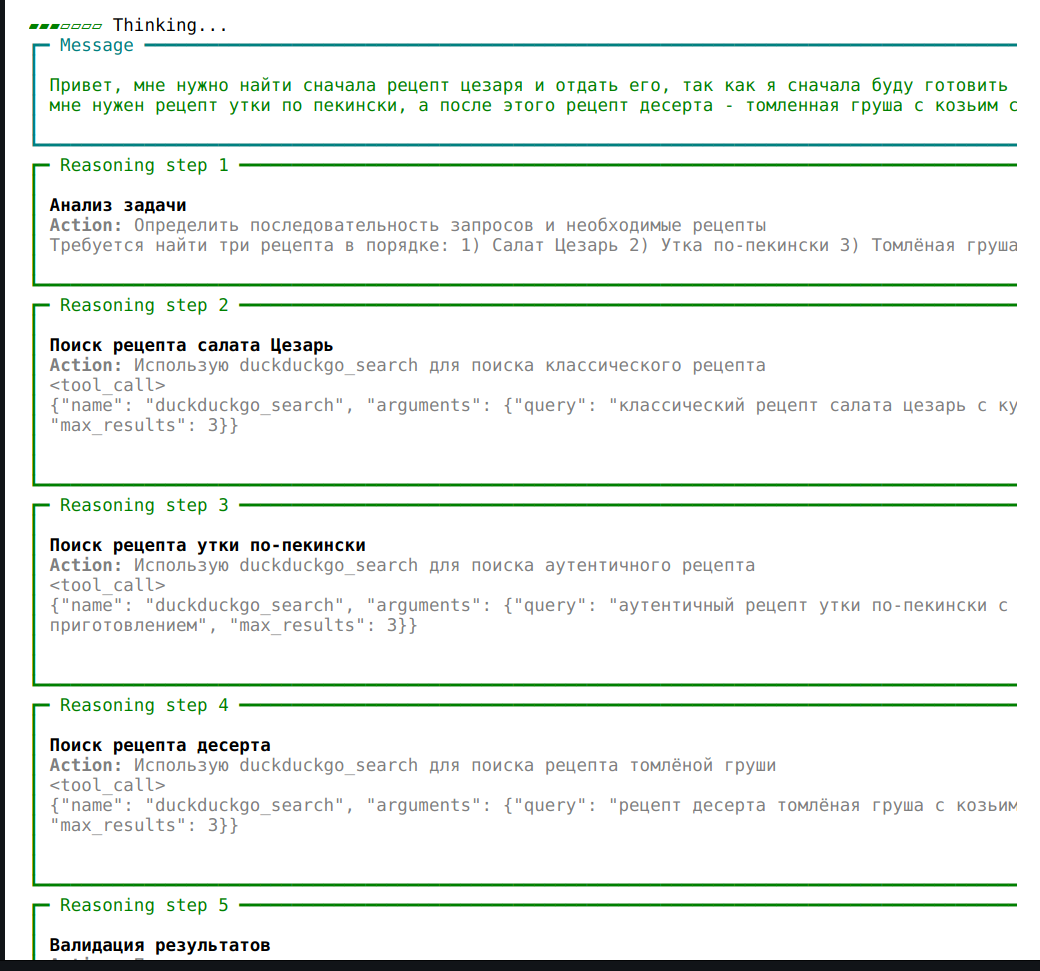 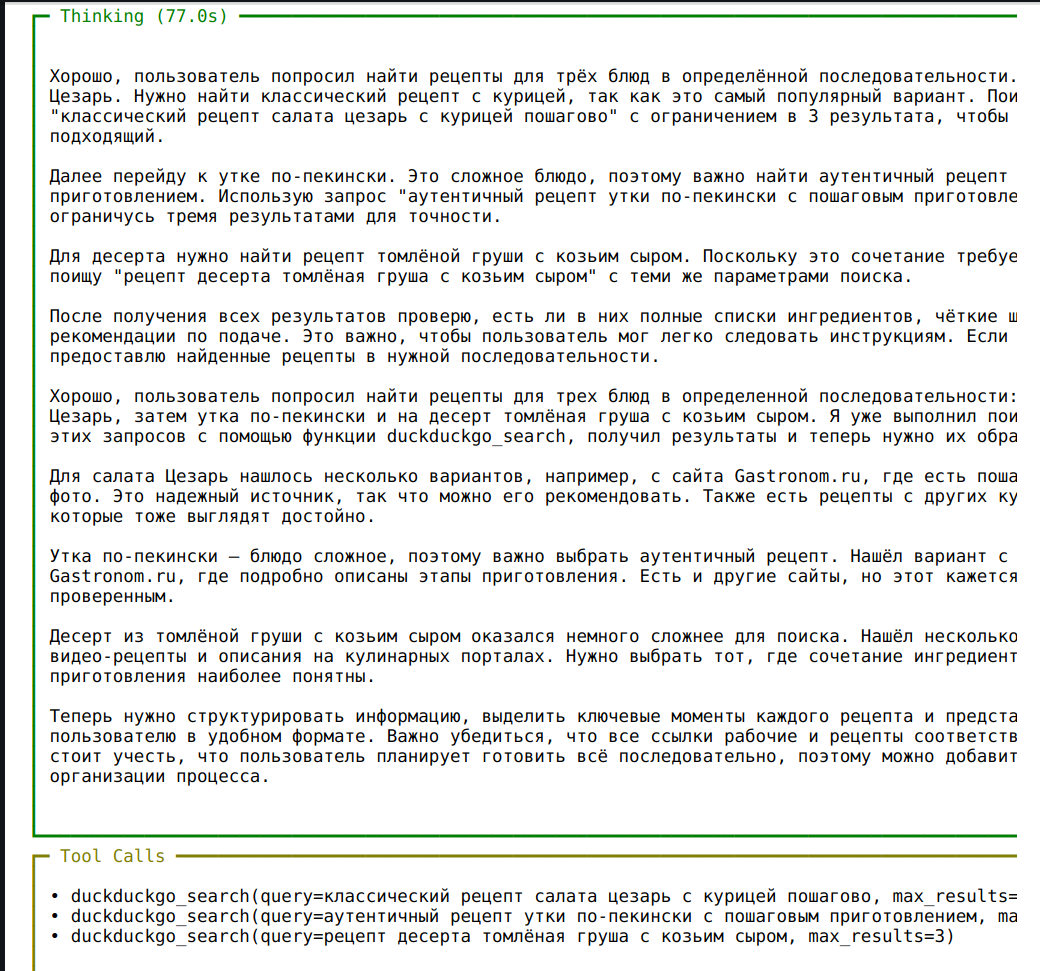 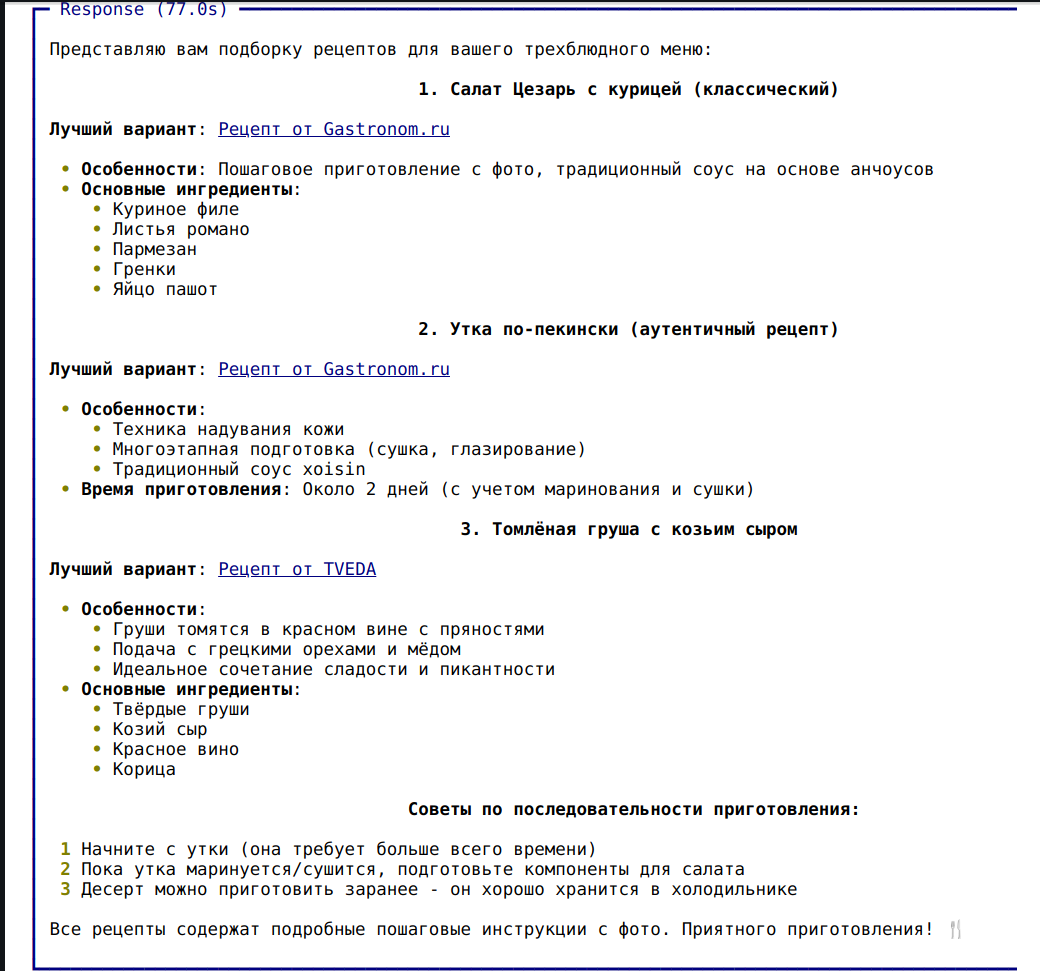

In [ ]:
from pydantic import BaseModel
from agno.team import Team

class SearchResult(BaseModel):
  question: str
  sources: list[dict[str,str]]
  answer: str

planning_agent = Agent(
  name="planner",
  markdown=True,
  role="Planning task and actions",
  instructions="Твоя задача - сделать докомпозицию задачи, если она сложная и ее нужно декомпозировать на более мелкие и простые задачи",
  reasoning=True
)

research_agent = Agent(
  name="researcher",
  role="Research info in web with sources",
  markdown=True,
  db=db,
  memory_manager=memory,
  enable_user_memories=True,
  tools=[DuckDuckGoTools(fixed_max_results=5, enable_news=False, enable_search=True)],
  instructions="Твоя задача - найти необходимую информацию в интернете по запросам, которые тебе передают и отдавать максимально релевантные данные для ответа в виде источников",
)

reviewer_agent = Agent(
  name="reviewer",
  markdown=True,
  role="Review the info and create summary by sources",
  instructions="Твоя задача - оценить источники, которые тебе предоставляют и сделать итоговое саммари по ним + также оставить источники в ответе для передачи в работу следующему агенту"
)

search_team = Team(
  name="Research Team",
  model=model,
  stream=True,
  
  output_schema=SearchResult,
  members=[planning_agent, research_agent, reviewer_agent],
  instructions="Обработай запрос пользователя и используй координацию между участниками команды для организации полного и комплексного ответа пользователю. В итоге пользователь должен получить отформатированный ответ с помощью нашего агента formatter. Используй всегда русский язык для всех агентов и всех запросов."
)
search_team.print_response("Кто такие группа Звери, когда они появились, какие их самые популярные песни, что о них известно сейчас?", stream=True)

INFO Agent 'planner' inheriting model from Team: tngtech/tng-r1t-chimera:free

INFO Agent 'researcher' inheriting model from Team: tngtech/tng-r1t-chimera:free

INFO Agent 'reviewer' inheriting model from Team: tngtech/tng-r1t-chimera:free

Output()

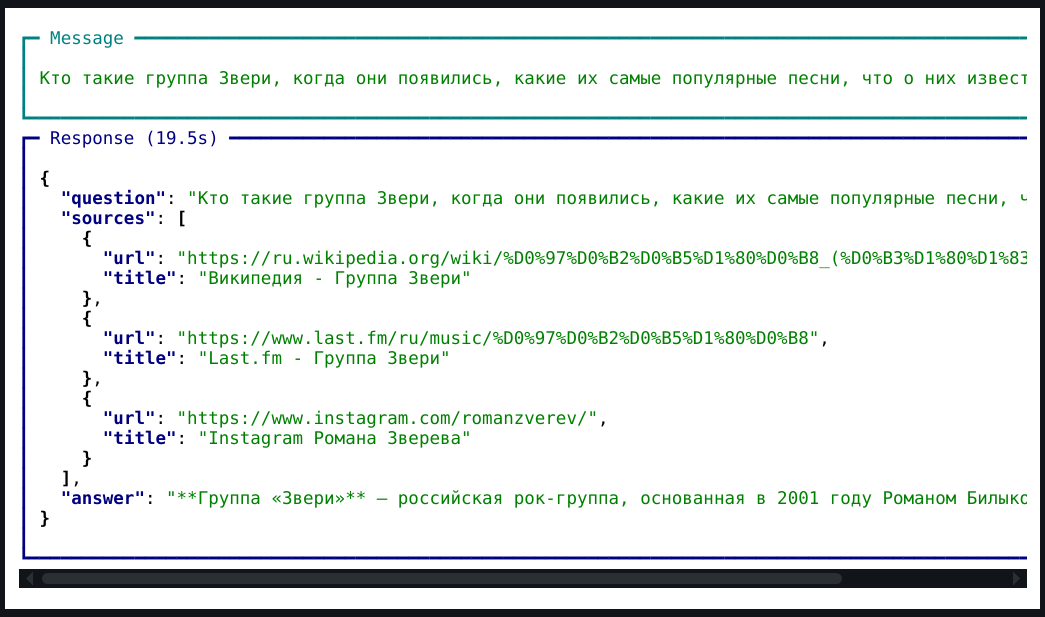